In [1]:
import sleap

INFO:numexpr.utils:Note: detected 256 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO:numexpr.utils:Note: NumExpr detected 256 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [6]:
metrics = sleap.load_metrics(
    "naps_data/sleap-models/centered_instance/metrics.train.npz", split="val"
)
skeleton = sleap.skeleton.Skeleton.load_json("naps_data/naps_skeleton.json")
px_to_mm = 15.5

In [7]:
import pandas as pd

dists = metrics["dist.dists"]
res = dists * (1 / px_to_mm)
res = pd.DataFrame(res, columns=skeleton.node_names)
res = pd.melt(
    res, value_vars=skeleton.node_names, var_name="Landmark", value_name="Error (mm)"
)

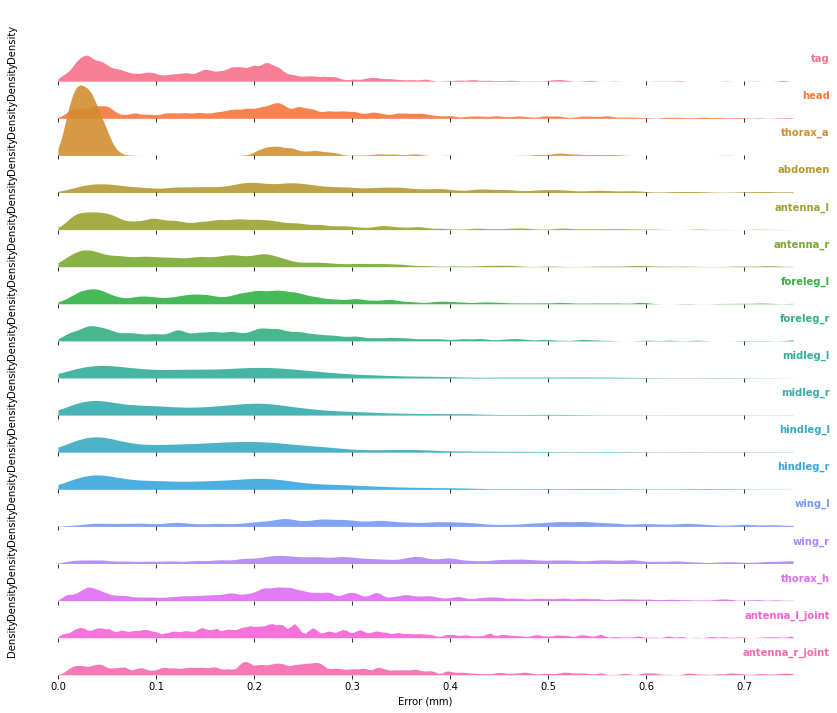

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(
    res, row="Landmark", hue="Landmark", aspect=20, height=0.6, palette="husl"
)
g.map(
    sns.kdeplot,
    "Error (mm)",
    clip=(0, 0.75),
    bw_adjust=0.025,
    fill=True,
    alpha=0.9,
    linewidth=0,
)
g.map(plt.axhline, y=0, lw=1.0, c="k")


def label(x, color, label):
    ax = plt.gca()
    ax.patch.set_alpha(0)
    ax.text(
        1,
        0.3,
        label,
        fontweight="bold",
        color=color,
        ha="right",
        va="center",
        transform=ax.transAxes,
    )


g.map(label, "Landmark")

g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)
g.fig.subplots_adjust(hspace=-0.5)
plt.xlabel("Error (mm)")
plt.savefig("error_distribution.png", dpi=300)

In [5]:
errors_90th = res.groupby("Landmark").quantile(0.90)
errors_90th_px = errors_90th * 15.5

errors_80th = res.groupby("Landmark").quantile(0.75)
errors_80th_px = errors_80th * 15.5

In [9]:
# !sleap-convert --format analysis --o naps_data/intermediate-files/20220823-1633-cut-to-20220824-1200to1201-libx264-naps.analysis.h5 naps_data/naps-tracks/20220823-1633-cut-to-20220824-1200to1201-libx264-naps.slp

INFO:numexpr.utils:Note: detected 256 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO:numexpr.utils:Note: NumExpr detected 256 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
track_names: 47
node_names: 17
edge_names: 17
edge_inds: 17
tracks: (1202, 17, 2, 47)
track_occupancy: (47, 1202)
point_scores: (1202, 17, 47)
instance_scores: (1202, 47)
tracking_scores: (1202, 47)
labels_path: naps_data/naps-tracks/20220823-1633-cut-to-20220824-1200to1201-libx264-naps.slp
video_path: 20220823-1633-cut-to-20220824-1200to1201-libx264.mp4
video_ind: 0
provenance: {}
Saved as naps_data/intermediate-files/20220823-1633-cut-to-20220824-1200to1201-libx264-naps.analysis.h5


In [10]:
# Post NAPS
filename = "naps_data/intermediate-files/20220823-1633-cut-to-20220824-1200to1201-libx264-naps.analysis.h5"

In [11]:
import h5py
import numpy as np

with h5py.File(filename, "r") as f:
    dset_names = list(f.keys())
    locations = f["tracks"][:].T
    node_names = [n.decode() for n in f["node_names"][:]]

print("===filename===")
print(filename)
print()

print("===HDF5 datasets===")
print(dset_names)
print()

print("===locations data shape===")
print(locations.shape)
print()

print("===nodes===")
for i, name in enumerate(node_names):
    print(f"{i}: {name}")
print()

===filename===
naps_data/intermediate-files/20220823-1633-cut-to-20220824-1200to1201-libx264-naps.analysis.h5

===HDF5 datasets===
['edge_inds', 'edge_names', 'instance_scores', 'labels_path', 'node_names', 'point_scores', 'provenance', 'track_names', 'track_occupancy', 'tracking_scores', 'tracks', 'video_ind', 'video_path']

===locations data shape===
(1202, 17, 2, 47)

===nodes===
0: tag
1: head
2: thorax_a
3: abdomen
4: antenna_l
5: antenna_r
6: foreleg_l
7: foreleg_r
8: midleg_l
9: midleg_r
10: hindleg_l
11: hindleg_r
12: wing_l
13: wing_r
14: thorax_h
15: antenna_l_joint
16: antenna_r_joint



In [12]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib.patches import Circle

mpl.rcParams["figure.facecolor"] = "w"
mpl.rcParams["figure.dpi"] = 150
mpl.rcParams["savefig.dpi"] = 600
mpl.rcParams["savefig.transparent"] = True
mpl.rcParams["font.size"] = 15
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.sans-serif"] = ["Arial", "DejaVu Sans"]
mpl.rcParams["axes.titlesize"] = "xx-large"  # medium, large, x-large, xx-large

mpl.style.use("seaborn-deep")

/Genomics/argo/users/swwolf/.conda/envs/sleap_dev/lib/python3.7/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


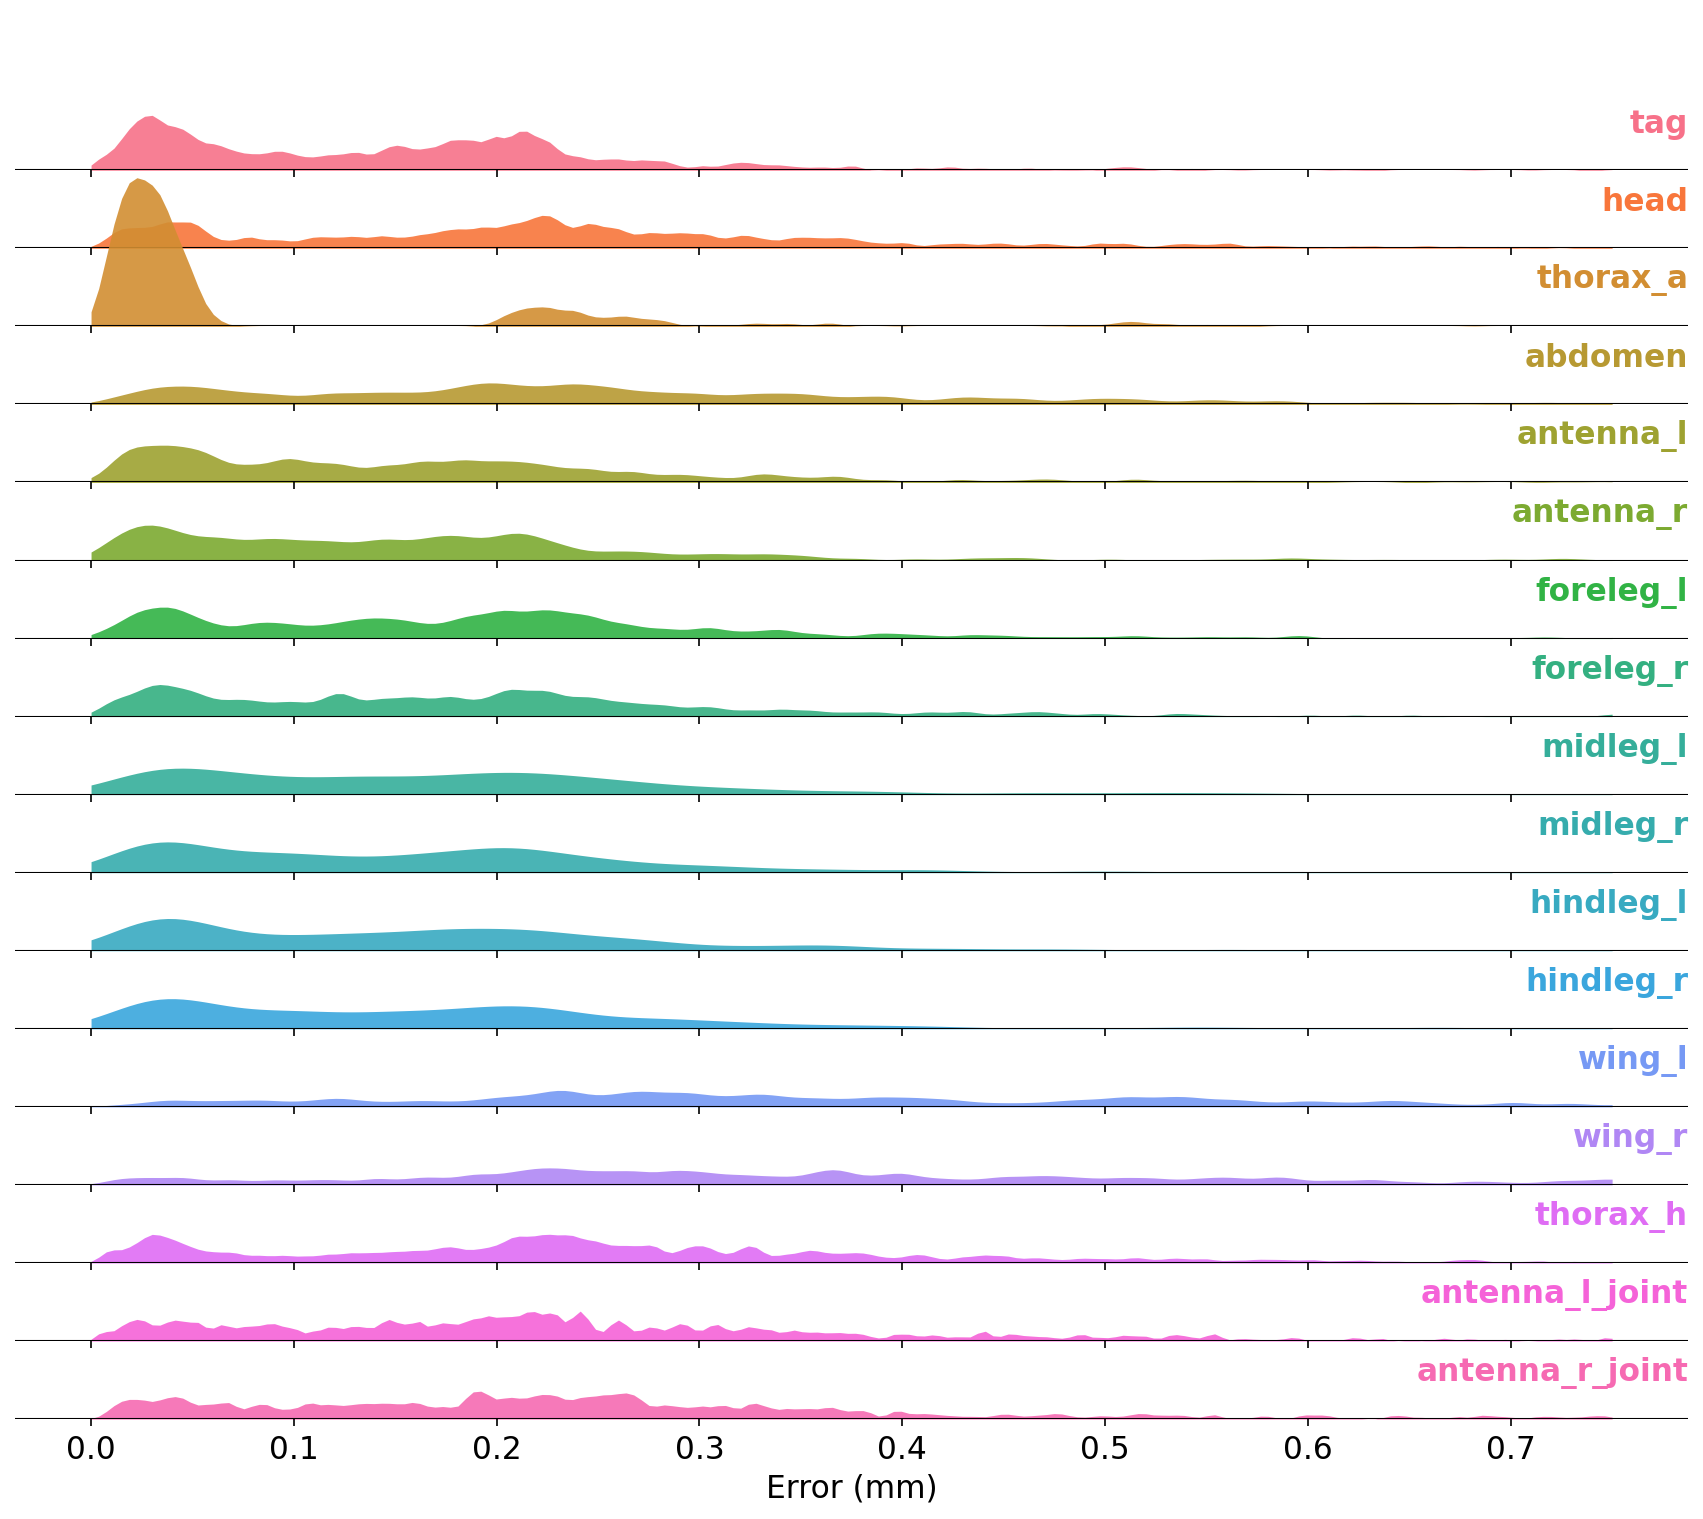

In [16]:
g = sns.FacetGrid(
    res, row="Landmark", hue="Landmark", aspect=20, height=0.6, palette="husl"
)
g.map(
    sns.kdeplot,
    "Error (mm)",
    clip=(0, 0.75),
    bw_adjust=0.025,
    fill=True,
    alpha=0.9,
    linewidth=0,
)
g.map(plt.axhline, y=0, lw=1.0, c="k")


def label(x, color, label):
    ax = plt.gca()
    ax.patch.set_alpha(0)
    ax.set_ylabel("")
    ax.text(
        1,
        0.3,
        label,
        fontweight="bold",
        color=color,
        ha="right",
        va="center",
        transform=ax.transAxes,
    )


g.map(label, "Landmark")

g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)
g.fig.subplots_adjust(hspace=-0.5)
plt.xlabel("Error (mm)")
plt.savefig("figures/error_distribution.png", dpi=300)

In [27]:
errors_90th = res.groupby("Landmark").quantile(0.90)
errors_90th_px = errors_90th * 15.5

errors_75th = res.groupby("Landmark").quantile(0.75)
errors_75th_px = errors_75th * 15.5

In [63]:
import cv2

FRAME_NUMBER = 1099

pose = locations[FRAME_NUMBER, :, :, 2]
videofile = "naps_data/videos/20220823-1633-cut-to-20220824-1200to1201-libx264.mp4"

cap = cv2.VideoCapture(videofile)
cap.set(1, FRAME_NUMBER)
success, img = cap.read()

/Genomics/argo/users/swwolf/.conda/envs/sleap_dev/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "w-" (-> color='w'). The keyword argument will take precedence.


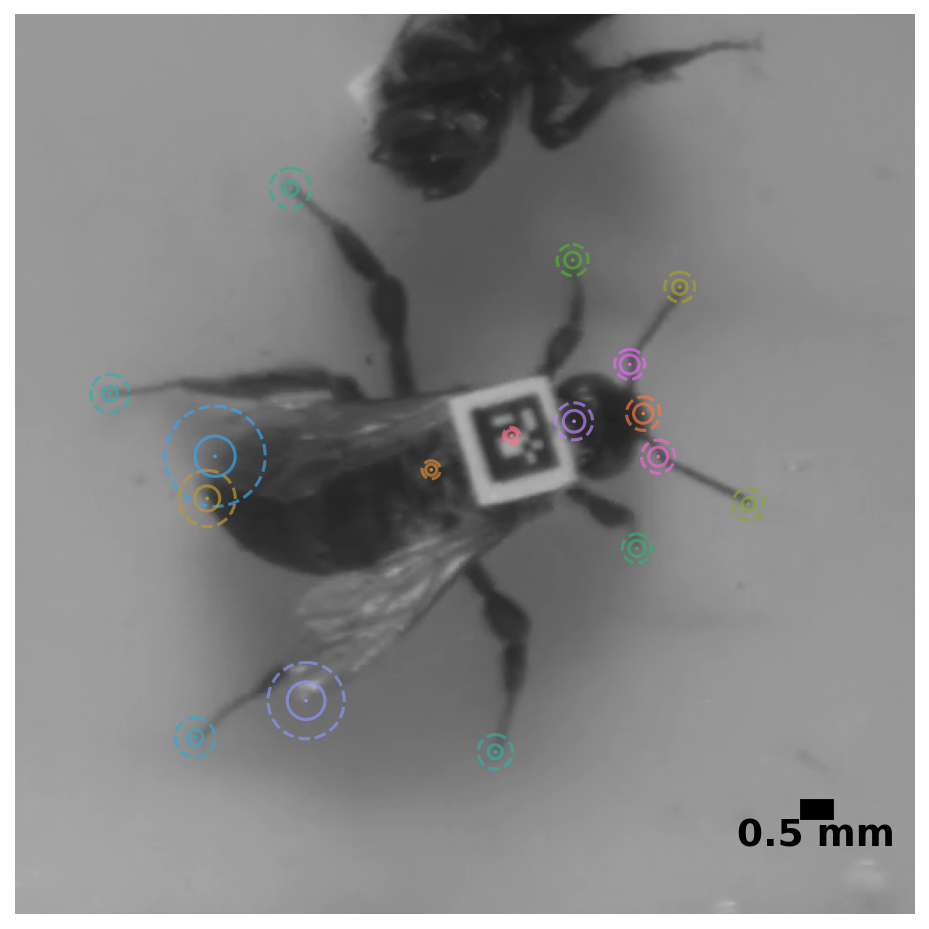

In [66]:
px_per_mm = 15.5
ctr = np.nanmean(pose, axis=0)
window = [-256, 256]
nodes = node_names
tmp = [errors_90th_px[errors_90th_px.index == node] for node in node_names]
tmp = pd.concat(tmp)
perc_errs = tmp.to_numpy()
percs = np.array(["90"])

fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0, 0, 1, 1], frameon=False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.autoscale(tight=True)
plt.imshow(img, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.ylim(window[::-1] + ctr[1])
plt.xlim(window + ctr[0])


cmap = sns.color_palette("husl", n_colors=len(nodes) + 1)
for j in range(len(nodes)):
    ax.add_patch(Circle(xy=pose[j], radius=1, fill=True, lw=0, alpha=0.7, fc=cmap[j]))
    ax.add_patch(
        Circle(
            xy=pose[j],
            radius=perc_errs[j],
            fill=False,
            lw=1.5,
            alpha=0.7,
            ec=cmap[j],
            label=f"{percs[j]}%" if j == 0 else None,
            ls="--",
        )
    )

tmp = [errors_75th_px[errors_75th_px.index == node] for node in node_names]
tmp = pd.concat(tmp)
perc_errs = tmp.to_numpy()
percs = np.array(["75"])

for j in range(len(nodes)):
    ax.add_patch(Circle(xy=pose[j], radius=1, fill=True, lw=0, alpha=0.7, fc=cmap[j]))
    ax.add_patch(
        Circle(
            xy=pose[j],
            radius=perc_errs[j],
            fill=False,
            lw=1.5,
            alpha=0.7,
            ec=cmap[j],
            label=f"{percs[j]}%" if j == 0 else None,
        )
    )

x, y = ctr[0] + 196, ctr[1] + 196
plt.plot([x, x + px_per_mm * 0.5], [y, y], "w-", color="black", lw=10)
plt.text(
    x + px_per_mm * 0.25,
    y + 5,
    "0.5 mm",
    fontweight="bold",
    color="black",
    ha="center",
    va="top",
    fontsize=18,
)
plt.savefig("figures/example_circles.png", dpi=600)